In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import glob
import os
import numpy as np
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/datasetsp.zip

Streaming output truncated to the last 5000 lines.
  inflating: unlabeled_images/unlabeled_image_png_95499.png  
  inflating: unlabeled_images/unlabeled_image_png_955.png  
  inflating: unlabeled_images/unlabeled_image_png_9550.png  
  inflating: unlabeled_images/unlabeled_image_png_95500.png  
  inflating: unlabeled_images/unlabeled_image_png_95501.png  
  inflating: unlabeled_images/unlabeled_image_png_95502.png  
  inflating: unlabeled_images/unlabeled_image_png_95503.png  
  inflating: unlabeled_images/unlabeled_image_png_95504.png  
  inflating: unlabeled_images/unlabeled_image_png_95505.png  
  inflating: unlabeled_images/unlabeled_image_png_95506.png  
  inflating: unlabeled_images/unlabeled_image_png_95507.png  
  inflating: unlabeled_images/unlabeled_image_png_95508.png  
  inflating: unlabeled_images/unlabeled_image_png_95509.png  
  inflating: unlabeled_images/unlabeled_image_png_9551.png  
  inflating: unlabeled_images/unlabeled_image_png_95510.png  
  inflating: unlabeled_

In [4]:
def read_images(file_path):
  x=[cv2.imread(file) for file in glob.glob(file_path+'/*.png')]
  return x

START

In [5]:
y=read_images('/content/train_images')

In [6]:
def add_noise(X):
    result = []
    for img in X:
        noisy = cv2.GaussianBlur(img, (9, 9), 0)
        result.append(noisy)
    return result


In [7]:
i=0
for m in y:
   y[i]= cv2.resize(m, (128,128))
   i=i+1

In [8]:
import numpy as np
sharp_images = np.random.randint(4, size=(5000,128,128,3))

In [9]:
for c in range(5000):
  sharp_images[c]=y[c]

In [10]:
sharp_images=sharp_images/255.0

In [11]:
noise_train=add_noise(y)

In [12]:
blur_images = np.random.randint(4, size=(5000,128,128,3))

In [13]:
for c in range(5000):
  blur_images[c]=noise_train[c]

In [14]:
blur_images=blur_images/255.0

In [15]:
x_train=blur_images[:3500,:,:,:]
y_train=sharp_images[:3500,:,:,:]
x_test=blur_images[3500:4000,:,:,:]
y_test=sharp_images[3500:4000,:,:,:]
x_val=blur_images[4000:5000,:,:,:]
y_val=sharp_images[4000:5000,:,:,:]

In [16]:
from keras import models, layers
model = models.Sequential()

#encode

model.add(layers.Conv2D(256, (3, 3), strides = 1, padding = 'same',activation='relu', input_shape = (128,128,3)))
model.add(layers.Conv2D(128, (3, 3), strides = 1, padding = 'same',activation='relu'))
model.add(layers.Conv2D(64, (3, 3), strides = 1, padding = 'same',activation='relu'))


model.add(layers.Conv2D(8, (3, 3), strides = 1, padding = 'same'))

#decode
model.add(layers.Conv2DTranspose(64, (3, 3), strides = 1, padding = 'same',activation='relu'))
model.add(layers.Conv2DTranspose(128, (3, 3), strides = 1, padding = 'same',activation='relu'))
model.add(layers.Conv2DTranspose(256, (3, 3), strides = 1, padding = 'same',activation='relu'))
model.add(layers.Conv2DTranspose(3, (3, 3), strides = 1, activation = 'sigmoid', padding = 'same'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 256)     7168      
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     295040    
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 64)      73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 8)       4616      
                                                                 
 conv2d_transpose (Conv2DTra  (None, 128, 128, 64)     4672      
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 128, 128, 128)    73856     
 ranspose)                                              

In [17]:
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
model.compile(loss = 'mse', optimizer = 'adam',metrics=['acc','mse'])
stop = EarlyStopping(monitor='val_loss',patience=9)

In [18]:
import tensorflow as tf
with tf.device('/device:GPU:0'):
    h=model.fit(x_train,y_train,epochs = 100, batch_size = 32,validation_data = (x_val,y_val))

Epoch 1/100
110/110 [==============================] - 36s 232ms/step - loss: 0.0127 - acc: 0.6186 - mse: 0.0127 - val_loss: 0.0029 - val_acc: 0.6454 - val_mse: 0.0029
Epoch 2/100
110/110 [==============================] - 23s 211ms/step - loss: 0.0019 - acc: 0.7753 - mse: 0.0019 - val_loss: 0.0015 - val_acc: 0.7954 - val_mse: 0.0015
Epoch 3/100
110/110 [==============================] - 23s 211ms/step - loss: 0.0012 - acc: 0.8225 - mse: 0.0012 - val_loss: 0.0013 - val_acc: 0.8287 - val_mse: 0.0013
Epoch 4/100
110/110 [==============================] - 23s 211ms/step - loss: 0.0011 - acc: 0.8152 - mse: 0.0011 - val_loss: 9.3291e-04 - val_acc: 0.8164 - val_mse: 9.3291e-04
Epoch 5/100
110/110 [==============================] - 23s 211ms/step - loss: 8.8437e-04 - acc: 0.8274 - mse: 8.8437e-04 - val_loss: 7.0199e-04 - val_acc: 0.8317 - val_mse: 7.0199e-04
Epoch 6/100
110/110 [==============================] - 23s 211ms/step - loss: 8.4780e-04 - acc: 0.8367 - mse: 8.4780e-04 - val_loss: 6.2

In [43]:
preds = model.predict(x_test)

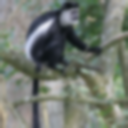

In [46]:
from google.colab.patches import cv2_imshow
cv2_imshow(x_test[0]*255)

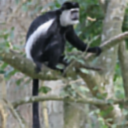

In [45]:
from google.colab.patches import cv2_imshow
cv2_imshow(preds[0]*255)

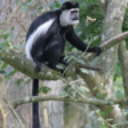

In [24]:
cv2_imshow(y_test[0]*255)

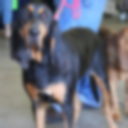

In [47]:
cv2_imshow(x_test[1]*255)

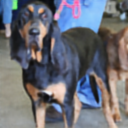

In [48]:
cv2_imshow(preds[1]*255)

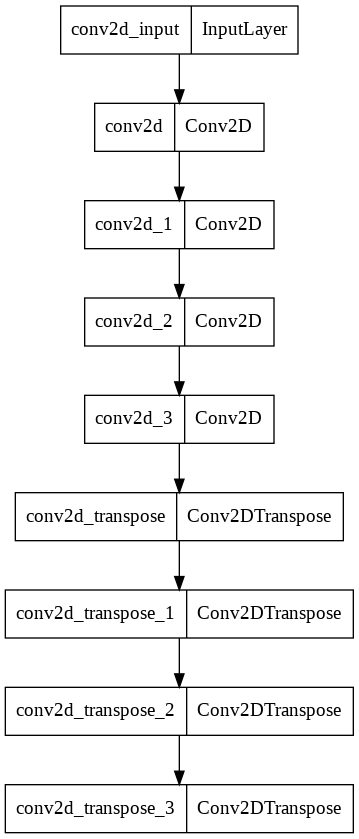

In [49]:
from tensorflow import keras
keras.utils.plot_model(model)

Text(0, 0.5, 'Loss')

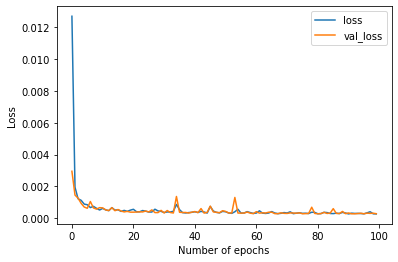

In [28]:
loss = pd.DataFrame(h.history)
loss[['loss','val_loss']].plot()
plt.xlabel("Number of epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

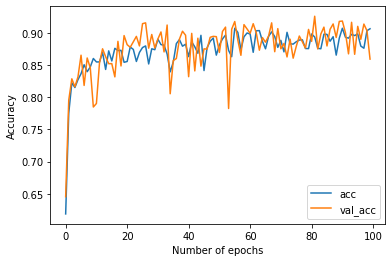

In [29]:
loss[['acc','val_acc']].plot()
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")

In [30]:
print(model.metrics_names)
print(model.evaluate(x_test1,y_test1,verbose=0))

['loss', 'acc', 'mse']
[0.00028598145581781864, 0.8513022661209106, 0.00028598145581781864]


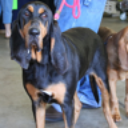

In [50]:
cv2_imshow(y_test[1]*255)

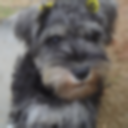

In [51]:
cv2_imshow(x_test[4]*255)

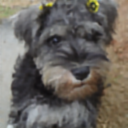

In [52]:
cv2_imshow(preds[4]*255)

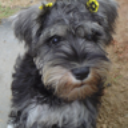

In [53]:
cv2_imshow(y_test[4]*255)

In [54]:
def mse(imageA, imageB):
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return err

In [55]:
mse(preds[0],y_test1[0])

0.000936664847645543

In [74]:
from skimage.metrics import structural_similarity as ssim
sum=0
for i in range(500):
  sum=sum+ssim(preds[i]*255,y_test[i]*255,multichannel=True)/500

/usr/local/lib/python3.7/dist-packages/skimage/metrics/_structural_similarity.py:108: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  im2[..., ch], **args)


In [75]:
print(sum)

0.8994406019310118


In [66]:
from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [67]:
PSNR(y_test1[0]*255,preds[0]*255)

35.05537031310136

In [72]:
sum1=0
for i in range(500):
  sum1=sum1+PSNR(preds[i]*255,y_test[i]*255)/500

In [73]:
sum1

35.99635556573915